<a href="https://colab.research.google.com/github/atishpanday/Handwritten-Digits-Recognition/blob/main/Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Conv2D, GlobalAveragePooling2D, Flatten, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [41]:
input = []
for i in range(10):
  with open("/content/drive/MyDrive/handwritten_data/data{k}.txt".format(k=i),"rb") as f:
    data = f.read()
    input.append(data)

input_data = []
for j in range(10):
  i = 0
  while (i<784000):
    input_data.append(input[j][i:i+784])
    i += 784

for i in range(10000):
  input_data[i] = np.frombuffer(input_data[i],dtype=np.ubyte)

input_data = np.array(input_data,dtype=float)

In [255]:
input_data = np.reshape(input_data,(10000,28,28,1))
np.shape(input_data)

labels = []
for i in range(10):
  for j in range(1000):
    labels.append(np.zeros((10)))
    labels[i*1000+j][i] = 1;

labels = np.reshape(labels,(10000,10))

In [259]:
x_train, x_test, y_train, y_test = train_test_split(input_data,labels,test_size = 0.2,shuffle=True)
print(np.shape(x_train),np.shape(y_train),len(x_test),len(y_test))

In [266]:
model = Sequential()

model.add(Conv2D(16,
                 (3,3),
                 padding = "valid",
                 activation = "linear",
                 strides = 1,
                 data_format = "channels_last"))
model.add(Activation("selu"))
model.add(Conv2D(16,
                 (3,3),
                 padding = "valid",
                 activation = "linear",
                 strides = 1))
model.add(Activation("selu"))
model.add(Conv2D(8,
                 (3,3),
                 padding = "valid",
                 activation = "linear",
                 strides = 1))
model.add(Activation("selu"))
model.add(GlobalAveragePooling2D())
model.add(Dense(32, activation="selu"))
model.add(Dense(32, activation="selu"))
model.add(Dense(10, activation="softmax"))
adam = Adam(lr=0.001)
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ["accuracy"])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size = 16, verbose = 1, shuffle = True)

Epoch 1/50
500/500 [==============================] - 11s 22ms/step - loss: 0.4934 - accuracy: 0.1992 - val_loss: 0.2083 - val_accuracy: 0.6435
Epoch 2/50
500/500 [==============================] - 11s 22ms/step - loss: 0.1904 - accuracy: 0.6527 - val_loss: 0.1574 - val_accuracy: 0.7310
Epoch 3/50
500/500 [==============================] - 11s 22ms/step - loss: 0.1491 - accuracy: 0.7294 - val_loss: 0.1293 - val_accuracy: 0.7815
Epoch 4/50
500/500 [==============================] - 11s 22ms/step - loss: 0.1152 - accuracy: 0.8132 - val_loss: 0.0899 - val_accuracy: 0.8670
Epoch 5/50
500/500 [==============================] - 11s 22ms/step - loss: 0.0780 - accuracy: 0.8783 - val_loss: 0.0841 - val_accuracy: 0.8665
Epoch 6/50
500/500 [==============================] - 11s 22ms/step - loss: 0.0651 - accuracy: 0.8948 - val_loss: 0.0560 - val_accuracy: 0.9190
Epoch 7/50
500/500 [==============================] - 11s 22ms/step - loss: 0.0566 - accuracy: 0.9119 - val_loss: 0.0532 - val_accuracy:

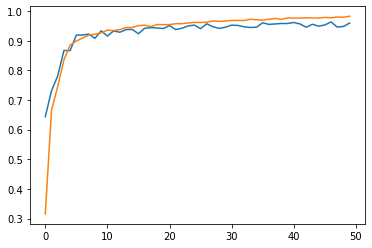

In [270]:
plt.plot(np.arange(50),history.history['val_accuracy'],history.history['accuracy'])